In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [22]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
data = pd.read_csv("../datasets/fallData.csv")

# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d/%m/%y %H:%M')

# Extract features from the datetime column
data['timestamp'] = data['datetime'].astype(int) // 10**9
# print(data['datetime'][1])

In [23]:
# Split the dataset into features (X) and target variable (y)
X = data[['timestamp']]
y = data['vid']
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X.values, y)

LinearRegression()

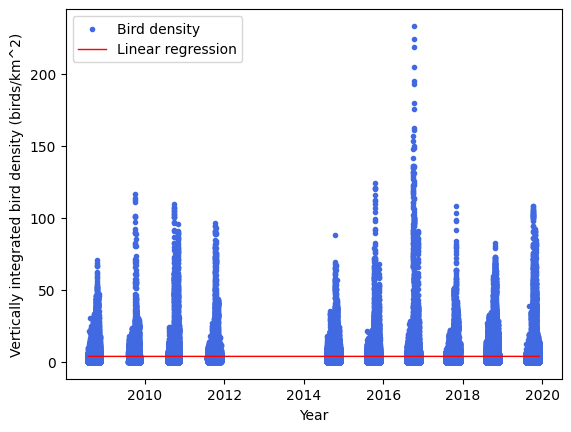

In [75]:
%matplotlib inline

# Plotting code
plt.xlabel('Year')
plt.ylabel('Vertically integrated bird density (birds/km^2)')
plt.scatter(data['datetime'], data['vid'], marker='.', label='Bird density')
plt.plot(data['datetime'], model.predict(X.values), color='red', linewidth=1, label='Linear regression')
plt.legend(loc=2)

# Save and display the plot
plt.savefig('../output-results/birdDensities.png')
plt.show()

In [76]:
# Predict the bird density for a given datetime
new_datetime_2008 = pd.to_datetime('30/11/2008 16:30', format='%d/%m/%Y %H:%M')
new_timestamp_2008 = new_datetime_2008.timestamp()
new_temperature_2008 = model.predict([[new_timestamp_2008]])

new_datetime_2019 = pd.to_datetime('30/11/2049 16:30', format='%d/%m/%Y %H:%M')
new_timestamp_2019 =new_datetime_2019.timestamp()
new_temperature_2019 = model.predict([[new_timestamp_2019]])

print('Vertical bird Density in', new_datetime_2008 ,'is', new_temperature_2008, 'birds/km^2')
print('Vertical bird Density in', new_datetime_2019 ,'is', new_temperature_2019, 'birds/km^2')

Vertical bird Density in 2008-11-30 16:30:00 is [3.85448553] birds/km^2
Vertical bird Density in 2049-11-30 16:30:00 is [3.92290098] birds/km^2
